In [191]:
import pandas as pd
import numpy as np

### Dataset

In [192]:
df = pd.read_csv("D:\datasets\cereal.csv")
copy_df = df.copy()

### Exploring the Dataset

In [193]:
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


In [195]:
df.shape

(77, 16)

In [196]:
df.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


### Handling null values

In [197]:
df.isna().sum()

name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

In [198]:
# we don't have any null values but we have  negative 1 values
df[(df == -1).any(axis=1)]

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
20,Cream of Wheat (Quick),N,H,100,3,0,80,1.0,21.0,0,-1,0,2,1.0,1.00,64.533816
57,Quaker Oatmeal,Q,H,100,5,2,0,2.7,-1.0,-1,110,0,1,1.0,0.67,50.828392


In [199]:
# Calculating mean
avg_potass = round(df['potass'].mean(),2)
avg_sugars = round(df['sugars'].mean(),2)
avg_carbo = round(df['carbo'].mean(),2)

print(avg_potass)
print(avg_sugars)
print(avg_carbo)

96.08
6.92
14.6


In [200]:
# Filling -1 values
df['potass'] = df['potass'].replace({-1 :avg_potass})
df['carbo'] = df['carbo'].replace({-1 :avg_carbo})
df['sugars'] = df['sugars'].replace({-1: avg_sugars})

In [201]:
df[(df == -1).any(axis=1)]

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating


### Inconsistent Formating

In [202]:
df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.00,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.00,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.00,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.00,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8.0,96.08,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3.0,60.00,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12.0,25.00,25,2,1.0,1.00,27.753301
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3.0,115.00,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3.0,110.00,25,1,1.0,1.00,51.592193


In [203]:
df['mfr'].unique()

array(['N', 'Q', 'K', 'R', 'G', 'P', 'A'], dtype=object)

In [204]:
# We all Know these are the brands. For more understanding we will replace the letters with full form of them.
ltds ={
    'N' : 'nabisco',
    'Q' : 'quaker oats',
    'K' : 'kelloggs',
    'R' : 'ralston purina',
    'G' : 'general mills',
    'P' : 'post',
    'A' : 'american home food products'
}
df['mfr'] = df['mfr'].map(ltds)

In [205]:
df['type'].unique()

array(['C', 'H'], dtype=object)

In [206]:
# We are making letters to fullform in type column
df['type'] = df['type'].map(
    {
        'C' : 'cold',
        'H' : 'hot'
    }
)

In [207]:
# Rating is inconsistent here. Rating always be with one decimal value and we make it for 10 points
df['rating'] = round(df['rating']/10,1)

In [208]:
df['shelf'].unique()

array([3, 1, 2])

In [209]:
# According to dataset these packets are placed in certain shelf row for more convinient we making them as text
df['shelf'] = df['shelf'].map(
    {
        1 : 'top',
        2 : 'middle',
        3 : 'bottom'
    }
)

In [210]:
df['vitamins'].unique()

array([ 25,   0, 100])

In [211]:
# We have only 3 categories. So we can make it into categorical data.
df['vitamins'] = df['vitamins'].map(
    {
        0 : 'minimal',
        25 : 'standard',
        100 : 'high'
    }
)

In [212]:
df.sort_values(by= 'rating',ascending=False)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
3,All-Bran with Extra Fiber,kelloggs,cold,50,4,0,140,14.0,8.0,0.0,330.0,standard,bottom,1.00,0.50,9.4
64,Shredded Wheat 'n'Bran,nabisco,cold,90,3,0,0,4.0,19.0,0.0,140.0,minimal,top,1.00,0.67,7.4
65,Shredded Wheat spoon size,nabisco,cold,90,3,0,0,3.0,20.0,0.0,120.0,minimal,top,1.00,0.67,7.3
0,100% Bran,nabisco,cold,70,4,1,130,10.0,5.0,6.0,280.0,standard,bottom,1.00,0.33,6.8
63,Shredded Wheat,nabisco,cold,80,2,0,0,3.0,16.0,0.0,95.0,minimal,top,0.83,1.00,6.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14,Cocoa Puffs,general mills,cold,110,1,1,180,0.0,12.0,13.0,55.0,standard,middle,1.00,1.00,2.3
35,Honey Graham Ohs,quaker oats,cold,120,1,2,220,1.0,12.0,11.0,45.0,standard,middle,1.00,1.00,2.2
18,Count Chocula,general mills,cold,110,1,1,180,0.0,12.0,13.0,65.0,standard,middle,1.00,1.00,2.2
12,Cinnamon Toast Crunch,general mills,cold,120,1,3,210,0.0,13.0,9.0,45.0,standard,middle,1.00,0.75,2.0


### Handling Duplicates

In [213]:
df['name'].nunique()
#No duplicates in this small dataset

77

### Changing Datatypes

In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     float64
 10  potass    77 non-null     float64
 11  vitamins  77 non-null     object 
 12  shelf     77 non-null     object 
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(7), int64(4), object(5)
memory usage: 9.8+ KB


In [215]:
df['protein'] = df['protein'].astype(float)

### Feature Extraction

In [216]:
df['caloric density'] = df.calories /df.weight

In [217]:
df['sugar to fiber ratio'] = round(df['sugars'] / df['fiber'],2)

In [218]:
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,caloric density,sugar to fiber ratio
0,100% Bran,nabisco,cold,70,4.0,1,130,10.0,5.0,6.0,280.00,standard,bottom,1.0,0.33,6.8,70.0,0.60
1,100% Natural Bran,quaker oats,cold,120,3.0,5,15,2.0,8.0,8.0,135.00,minimal,bottom,1.0,1.00,3.4,120.0,4.00
2,All-Bran,kelloggs,cold,70,4.0,1,260,9.0,7.0,5.0,320.00,standard,bottom,1.0,0.33,5.9,70.0,0.56
3,All-Bran with Extra Fiber,kelloggs,cold,50,4.0,0,140,14.0,8.0,0.0,330.00,standard,bottom,1.0,0.50,9.4,50.0,0.00
4,Almond Delight,ralston purina,cold,110,2.0,2,200,1.0,14.0,8.0,96.08,standard,bottom,1.0,0.75,3.4,110.0,8.00


### Handling Outliers

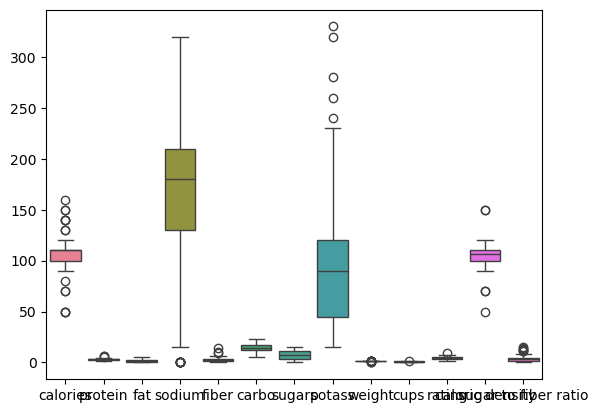

In [219]:
import seaborn as sns
import matplotlib.pyplot as plt

cols = ['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'weight', 'cups', 'rating', 'caloric density', 'sugar to fiber ratio']
sns.boxplot(data=df[cols])
plt.show()

#### Calculating range

In [220]:
# calories
calorie_q1 = df['calories'].quantile(0.25)
calorie_q3 = df['calories'].quantile(0.75)
calorie_iqr = calorie_q3 - calorie_q1

calorie_lower = calorie_q1 - 1.5 * calorie_iqr
calorie_higher = calorie_q3 + 1.5 * calorie_iqr

In [221]:
# Protine
protein_q1 = df['protein'].quantile(0.25)
protein_q3 = df['protein'].quantile(0.75)
protein_iqr = protein_q3 - protein_q1

protein_lower = protein_q1 - 1.5 * protein_iqr
proteine_higher = protein_q3 + 1.5 * protein_iqr

In [222]:
#fat
fat_q1 = df['fat'].quantile(0.25)
fat_q3 = df['fat'].quantile(0.75)
fat_iqr = fat_q3 - fat_q1

fat_lower = fat_q1 - 1.5 * fat_iqr
fat_higher = fat_q3 + 1.5 * fat_iqr

In [223]:
#sodium
sodium_q1 = df['sodium'].quantile(0.25)
sodium_q3 = df['sodium'].quantile(0.75)
sodium_iqr = sodium_q3 - sodium_q1

sodium_lower = sodium_q1 - 1.5 * sodium_iqr
sodium_higher = sodium_q3 + 1.5 * sodium_iqr

In [224]:
#fiber
fiber_q1 = df['fiber'].quantile(0.25)
fiber_q3 = df['fiber'].quantile(0.75)
fiber_iqr = fiber_q3 - fiber_q1

fiber_lower = fiber_q1 - 1.5 * fiber_iqr
fiber_higher = fiber_q3 + 1.5 * fiber_iqr

In [225]:
#potass
potass_q1 = df['potass'].quantile(0.25)
potass_q3 = df['potass'].quantile(0.75)
potass_iqr = potass_q3 - potass_q1

potass_lower = potass_q1 - 1.5 * potass_iqr
potass_higher = potass_q3 + 1.5 * potass_iqr

In [226]:
# weight
weight_q1 = df['weight'].quantile(0.25)
weight_q3 = df['weight'].quantile(0.75)
weight_iqr = weight_q3 - weight_q1

weight_lower = weight_q1 - 1.5 * weight_iqr
weight_higher = weight_q3 + 1.5 * weight_iqr

In [227]:
# cups
cups_q1 = df['cups'].quantile(0.25)
cups_q3 = df['cups'].quantile(0.75)
cups_iqr = cups_q3 - cups_q1

cups_lower = cups_q1 - 1.5 * cups_iqr
cups_higher = cups_q3 + 1.5 * cups_iqr

In [228]:
# rating
rating_q1 = df['rating'].quantile(0.25)
rating_q3 = df['rating'].quantile(0.75)
rating_iqr = rating_q3 - rating_q1

rating_lower = rating_q1 - 1.5 * rating_iqr
rating_higher = rating_q3 + 1.5 * rating_iqr

In [229]:
# caloric density
caloric_density_q1 = df['caloric density'].quantile(0.25)
caloric_density_q3 = df['caloric density'].quantile(0.75)
caloric_density_iqr = caloric_density_q3 - caloric_density_q1

caloric_density_lower = caloric_density_q1 - 1.5 * caloric_density_iqr
caloric_density_higher = caloric_density_q3 + 1.5 * caloric_density_iqr

In [230]:
# sugar to fiber ratio
sugar_to_fiber_ratio_q1 = df['sugar to fiber ratio'].quantile(0.25)
sugar_to_fiber_ratio_q3 = df['sugar to fiber ratio'].quantile(0.75)
sugar_to_fiber_ratio_iqr = sugar_to_fiber_ratio_q3 - sugar_to_fiber_ratio_q1

sugar_to_fiber_ratio_lower = sugar_to_fiber_ratio_q1 - 1.5 * sugar_to_fiber_ratio_iqr
sugar_to_fiber_ratio_higher = sugar_to_fiber_ratio_q3 + 1.5 * sugar_to_fiber_ratio_iqr

#### Changing the values according to outliers

In [231]:
df.loc[df['calories'] > calorie_higher,'calories'] = calorie_higher
df.loc[df['calories'] < calorie_lower,'calories'] = calorie_lower

In [232]:
df.loc[df['protein'] > proteine_higher,'protein'] = proteine_higher
df.loc[df['protein'] < protein_lower,'protein'] = protein_lower

In [233]:
df.loc[df['fat'] > fat_higher,'fat'] = fat_higher
df.loc[df['fat'] < fat_lower,'fat'] = fat_lower

In [234]:
df.loc[df['sodium'] > sodium_higher,'sodium'] = sodium_higher
df.loc[df['sodium'] < sodium_lower,'sodium'] = sodium_lower

In [235]:
df.loc[df['fiber'] > fiber_higher,'fiber'] = fiber_higher
df.loc[df['fiber'] < fiber_lower,'fiber'] = fiber_lower

In [236]:
df.loc[df['fiber'] > fiber_higher,'fiber'] = fiber_higher
df.loc[df['fiber'] < fiber_lower,'fiber'] = fiber_lower

In [237]:
df.loc[df['weight'] > weight_higher,'weight'] = weight_higher
df.loc[df['weight'] < weight_lower,'weight'] = weight_lower

In [238]:
df.loc[df['cups'] > cups_higher,'cups'] = cups_higher
df.loc[df['cups'] < cups_lower,'cups'] = cups_lower

In [239]:
df.loc[df['potass'] > potass_higher,'potass'] = potass_higher
df.loc[df['potass'] < potass_lower,'potass'] = potass_lower

In [240]:
df.loc[df['rating'] > rating_higher,'rating'] = rating_higher
df.loc[df['rating'] < rating_lower,'rating'] = rating_lower

In [241]:
df.loc[df['caloric density'] > caloric_density_higher,'caloric density'] = caloric_density_higher
df.loc[df['caloric density'] < caloric_density_lower,'caloric density'] = caloric_density_lower

In [242]:
df.loc[df['sugar to fiber ratio'] > sugar_to_fiber_ratio_higher,'sugar to fiber ratio'] = sugar_to_fiber_ratio_higher
df.loc[df['sugar to fiber ratio'] < sugar_to_fiber_ratio_lower,'sugar to fiber ratio'] = sugar_to_fiber_ratio_lower

In [243]:
df.columns

Index(['name', 'mfr', 'type', 'calories', 'protein', 'fat', 'sodium', 'fiber',
       'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups',
       'rating', 'caloric density', 'sugar to fiber ratio'],
      dtype='object')

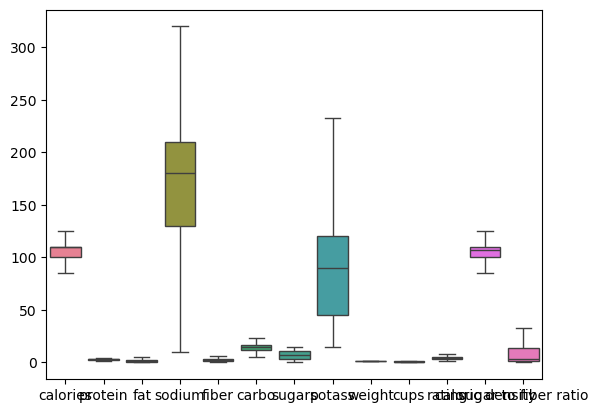

In [244]:
cols = ['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'weight', 'cups', 'rating', 'caloric density', 'sugar to fiber ratio']
sns.boxplot(data=df[cols])
plt.show()

### Renaming the columns of df

In [245]:
df.head(3)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,caloric density,sugar to fiber ratio
0,100% Bran,nabisco,cold,85,4.0,1,130,6.0,5.0,6.0,232.5,standard,bottom,1.0,0.33,6.8,85.0,0.60
1,100% Natural Bran,quaker oats,cold,120,3.0,5,15,2.0,8.0,8.0,135.0,minimal,bottom,1.0,1.00,3.4,120.0,4.00
2,All-Bran,kelloggs,cold,85,4.0,1,260,6.0,7.0,5.0,232.5,standard,bottom,1.0,0.33,5.9,85.0,0.56


In [246]:
copy_df.head(3)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505


### Renaming the columns and fullforming the shortforms

In [247]:
df.columns

Index(['name', 'mfr', 'type', 'calories', 'protein', 'fat', 'sodium', 'fiber',
       'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups',
       'rating', 'caloric density', 'sugar to fiber ratio'],
      dtype='object')

In [248]:
df.rename(columns={
    'name' : 'Cereal',
    'mfr' : 'Manufacturer',
    'cups' : 'Scoope'
},inplace= True)

In [249]:
df.columns = df.columns.str.capitalize()

In [250]:
df.columns

Index(['Cereal', 'Manufacturer', 'Type', 'Calories', 'Protein', 'Fat',
       'Sodium', 'Fiber', 'Carbo', 'Sugars', 'Potass', 'Vitamins', 'Shelf',
       'Weight', 'Scoope', 'Rating', 'Caloric density',
       'Sugar to fiber ratio'],
      dtype='object')

#### Converting shortfroms to full forms

In [251]:
df.head()

,Cereal,Manufacturer,Type,Calories,Protein,Fat,Sodium,Fiber,Carbo,Sugars,Potass,Vitamins,Shelf,Weight,Scoope,Rating,Caloric density,Sugar to fiber ratio
0,100% Bran,nabisco,cold,85,4.0,1,130,6.0,5.0,6.0,232.50,standard,bottom,1.0,0.33,6.8,85.0,0.60
1,100% Natural Bran,quaker oats,cold,120,3.0,5,15,2.0,8.0,8.0,135.00,minimal,bottom,1.0,1.00,3.4,120.0,4.00
2,All-Bran,kelloggs,cold,85,4.0,1,260,6.0,7.0,5.0,232.50,standard,bottom,1.0,0.33,5.9,85.0,0.56
3,All-Bran with Extra Fiber,kelloggs,cold,85,4.0,0,140,6.0,8.0,0.0,232.50,standard,bottom,1.0,0.50,7.8,85.0,0.00
4,Almond Delight,ralston purina,cold,110,2.0,2,200,1.0,14.0,8.0,96.08,standard,bottom,1.0,0.75,3.4,110.0,8.00


In [252]:
df['Cereal'] = df['Cereal'].str.capitalize()
df['Manufacturer'] = df['Manufacturer'].str.capitalize()
df['Type'] = df['Type'].str.capitalize()
df['Vitamins'] = df['Vitamins'].str.capitalize()
df['Shelf'] = df['Shelf'].str.capitalize()

In [253]:
df.head()

,Cereal,Manufacturer,Type,Calories,Protein,Fat,Sodium,Fiber,Carbo,Sugars,Potass,Vitamins,Shelf,Weight,Scoope,Rating,Caloric density,Sugar to fiber ratio
0,100% bran,Nabisco,Cold,85,4.0,1,130,6.0,5.0,6.0,232.50,Standard,Bottom,1.0,0.33,6.8,85.0,0.60
1,100% natural bran,Quaker oats,Cold,120,3.0,5,15,2.0,8.0,8.0,135.00,Minimal,Bottom,1.0,1.00,3.4,120.0,4.00
2,All-bran,Kelloggs,Cold,85,4.0,1,260,6.0,7.0,5.0,232.50,Standard,Bottom,1.0,0.33,5.9,85.0,0.56
3,All-bran with extra fiber,Kelloggs,Cold,85,4.0,0,140,6.0,8.0,0.0,232.50,Standard,Bottom,1.0,0.50,7.8,85.0,0.00
4,Almond delight,Ralston purina,Cold,110,2.0,2,200,1.0,14.0,8.0,96.08,Standard,Bottom,1.0,0.75,3.4,110.0,8.00


In [254]:
df.to_csv("cereals_cleaned.csv")